# Ejercicio:
Vamos a construir un dispositivo que se instalará en diferentes puntos de una ciudad (ejemplo farmacias) Vamos a implementar en el dispositivo el algoritmo elegido

Sobre el dataset de diabetes Decidir las mejores características para enfocar el modelo (analítica, visual, y algoritmicamente [random forest]) --> Teniendo en cuenta el objetivo de negocio

Decidir el enfoque (algoritmo) que mejor se ajusta al negocio Trabajar con tres subsets --> Entrenamiento, Prueba y Validación (Este último para comparara los diferentes Algoritmos)

## Lectura de Datos y EDA

In [164]:
# 1. Importar librerías
import numpy as np
import pandas as pd
import openpyxl

import plotly as py
import plotly.express as px
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

In [165]:
# 2. Importar datos
df_diabetes = pd.read_csv('Diabetes_es_ext.csv')
df_diabetes

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones,Fecha de diagnóstico
0,6,148,72,35,0,"33,6","0,627",50,Sí,NaN,NaN,2016-01-04
1,1,85,66,29,0,"26,6","0,351",31,No,prozac,NaN,2016-01-04
2,8,183,64,0,0,"23,3","0,672",32,Sí,NaN,NaN,2016-01-04
3,1,89,66,23,94,"28,1","0,167",21,No,NaN,NaN,2016-01-05
4,0,137,40,35,168,"43,1","2,288",33,Sí,"omeoprazol,simvastatina",NaN,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,"32,9","0,171",63,No,NaN,NaN,2016-12-15
764,2,122,70,27,0,"36,8","0,34",27,No,NaN,NaN,2016-12-16
765,5,121,72,23,112,"26,2","0,245",30,No,NaN,NaN,2016-12-16
766,1,126,60,0,0,"30,1","0,349",47,Sí,NaN,NaN,2016-12-16


In [166]:
df_diabetes['Diabetes'].value_counts()

Diabetes
No    500
Sí    268
Name: count, dtype: int64

### EDA 

In [167]:
# Se define una función para explorar un DataFrame
def exploratory_data_analysis(df):
    """
    Realiza un análisis exploratorio de datos en un DataFrame dado.
    
    Parámetros:
        df (DataFrame): El DataFrame para realizar el análisis exploratorio de datos.
    """
    # Información general del DataFrame
    print("Información del DataFrame:")
    print(df.info())
    print("\n")
    
    # Resumen estadístico del DataFrame
    print("Resumen estadístico del DataFrame:")
    print(df.describe())
    print("\n")
    
    # Cantidad de valores nulos por columna
    print("Cantidad de valores nulos por columna:")
    print(df.isnull().sum())
    print("\n")
    
    # Conteo de valores únicos por columna
    print("Conteo de valores únicos por columna:")
    print(df.nunique())

In [168]:
exploratory_data_analysis(df_diabetes)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Embarazos                768 non-null    int64 
 1   Glucosa                  768 non-null    int64 
 2   Presión sanguínea        768 non-null    int64 
 3   Pliegue cutáneo          768 non-null    int64 
 4   Insulina                 768 non-null    int64 
 5   Índice de masa corporal  768 non-null    object
 6   Pedigrí diabetes         768 non-null    object
 7   Edad                     768 non-null    int64 
 8   Diabetes                 768 non-null    object
 9   Medicación previa        14 non-null     object
 10  Observaciones            13 non-null     object
 11  Fecha de diagnóstico     768 non-null    object
dtypes: int64(6), object(6)
memory usage: 72.1+ KB
None


Resumen estadístico del DataFrame:
        Embarazos     Glucosa  Pr

In [169]:
# Convertir las variables numéricas de tipo objeto a tipo numérico
df_diabetes['Índice de masa corporal'] = pd.to_numeric(df_diabetes['Índice de masa corporal'].str.replace(',', '.'))
df_diabetes['Pedigrí diabetes'] = pd.to_numeric(df_diabetes['Pedigrí diabetes'].str.replace(',', '.'))

In [170]:
# Análisis de las variables que tienen v alores nulos
df_diabetes[df_diabetes[['Medicación previa', 'Observaciones']].isnull().any(axis=1)]

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones,Fecha de diagnóstico
0,6,148,72,35,0,33.6,0.627,50,Sí,NaN,NaN,2016-01-04
1,1,85,66,29,0,26.6,0.351,31,No,prozac,NaN,2016-01-04
2,8,183,64,0,0,23.3,0.672,32,Sí,NaN,NaN,2016-01-04
3,1,89,66,23,94,28.1,0.167,21,No,NaN,NaN,2016-01-05
4,0,137,40,35,168,43.1,2.288,33,Sí,"omeoprazol,simvastatina",NaN,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No,NaN,NaN,2016-12-15
764,2,122,70,27,0,36.8,0.340,27,No,NaN,NaN,2016-12-16
765,5,121,72,23,112,26.2,0.245,30,No,NaN,NaN,2016-12-16
766,1,126,60,0,0,30.1,0.349,47,Sí,NaN,NaN,2016-12-16


In [171]:
# Se sustituyen los valores nulos por lo siguiente:
# Reemplazar los valores nulos en 'Medicación previa' por 'Sin información'
df_diabetes['Medicación previa'].fillna('Sin información', inplace=True)

# Reemplazar los valores nulos en 'Observaciones' por 'Sin observaciones'
df_diabetes['Observaciones'].fillna('Sin observaciones', inplace=True)

# Verificar que los valores nulos han sido reemplazados
print("Cantidad de valores nulos por columna después del reemplazo:")
print(df_diabetes.isnull().sum())

Cantidad de valores nulos por columna después del reemplazo:
Embarazos                  0
Glucosa                    0
Presión sanguínea          0
Pliegue cutáneo            0
Insulina                   0
Índice de masa corporal    0
Pedigrí diabetes           0
Edad                       0
Diabetes                   0
Medicación previa          0
Observaciones              0
Fecha de diagnóstico       0
dtype: int64


/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_82352/4147992861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diabetes['Medicación previa'].fillna('Sin información', inplace=True)
/var/folders/79/rwrch1qx1y7bm5mc3hnnntw00000gn/T/ipykernel_82352/4147992861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

#### Transformaciones y/o eliminado de columnas

In [172]:
# Se elimina la columna Fecha de diagnóstico
df_diabetes = df_diabetes.drop(['Fecha de diagnóstico'], axis=1)

In [173]:
# Función para transformar las variables categóricas a numéricas

def label_encode_categorical(df):
    """
    Transforma las variables categóricas en variables numéricas utilizando LabelEncoder.

    Parámetros:
    - df: DataFrame. El DataFrame que contiene las variables categóricas a transformar.

    Retorna:
    - df_encoded: DataFrame. El DataFrame con las variables categóricas transformadas.
    """
    df_encoded = df.copy()  # Copiar el DataFrame para evitar modificar el original
    
    # Iterar sobre todas las columnas del DataFrame
    for column in df_encoded.columns:
        # Verificar si la columna es de tipo 'object' (categórica)
        if df_encoded[column].dtype == 'object':
            # Inicializar el LabelEncoder
            label_encoder = LabelEncoder()
            # Ajustar y transformar la columna
            df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    
    return df_encoded

In [174]:
# Uso de la función label_encode_categorical
df_diabetes_encoded = label_encode_categorical(df_diabetes)
df_diabetes_encoded

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones
0,6,148,72,35,0,33.6,0.627,50,1,0,13
1,1,85,66,29,0,26.6,0.351,31,0,10,13
2,8,183,64,0,0,23.3,0.672,32,1,0,13
3,1,89,66,23,94,28.1,0.167,21,0,0,13
4,0,137,40,35,168,43.1,2.288,33,1,7,13
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,13
764,2,122,70,27,0,36.8,0.340,27,0,0,13
765,5,121,72,23,112,26.2,0.245,30,0,0,13
766,1,126,60,0,0,30.1,0.349,47,1,0,13


#### Visualizaciones

In [175]:
# Función para visualización bivariante
def visualize_bivariate_numeric(df, target):
    # Gráficos de histogramas para variables numéricas
    for feature in df.columns:
        if feature != target:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=feature, hue=target, kde=True, palette='viridis')
            plt.title(f'Distribución de {feature} por {target}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.show()

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

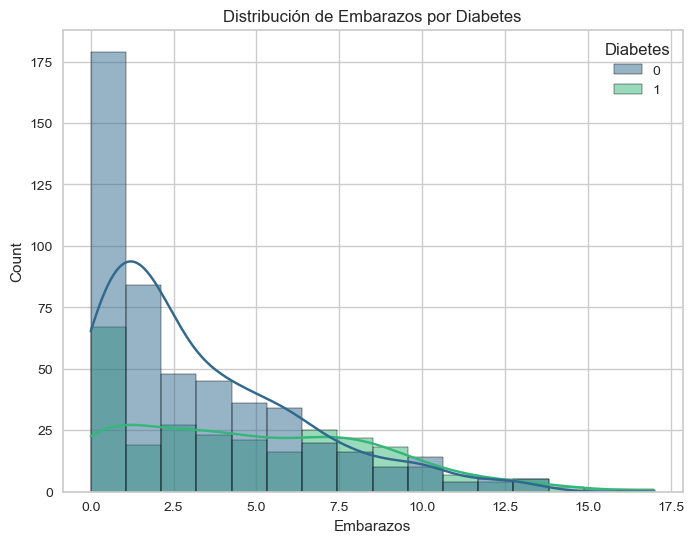

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

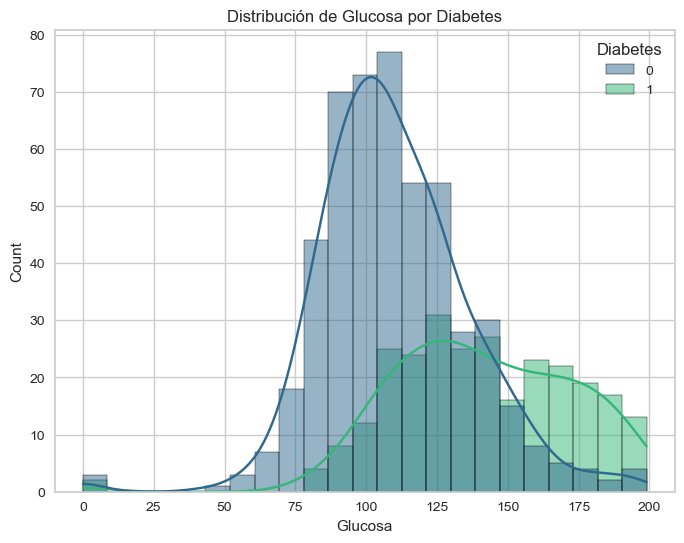

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

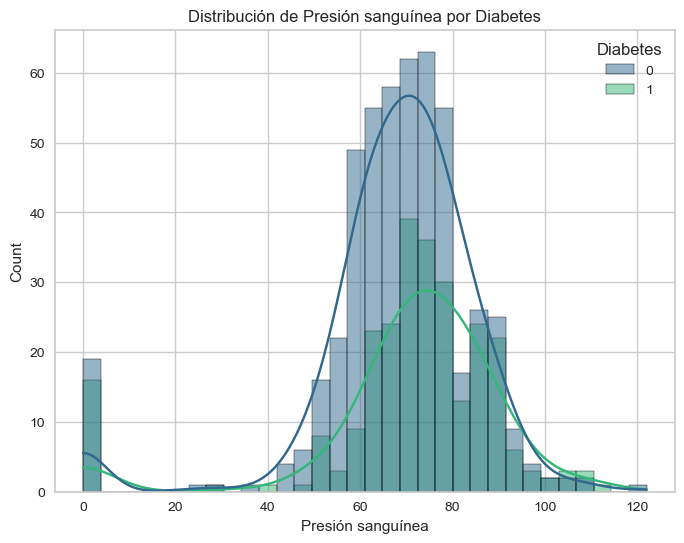

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

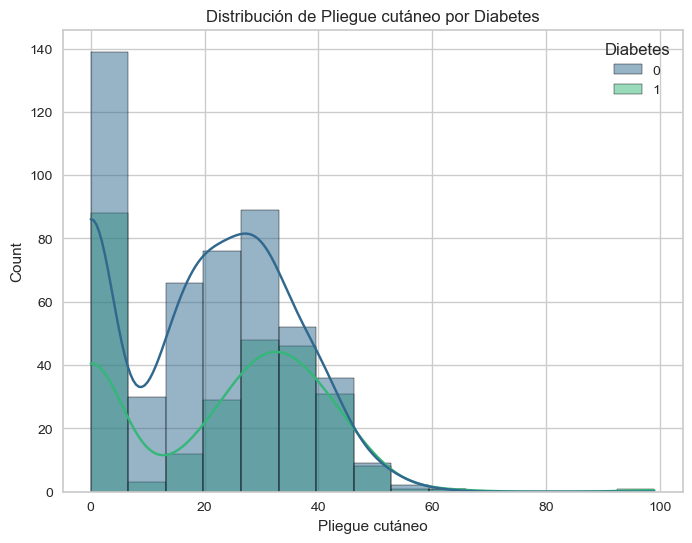

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

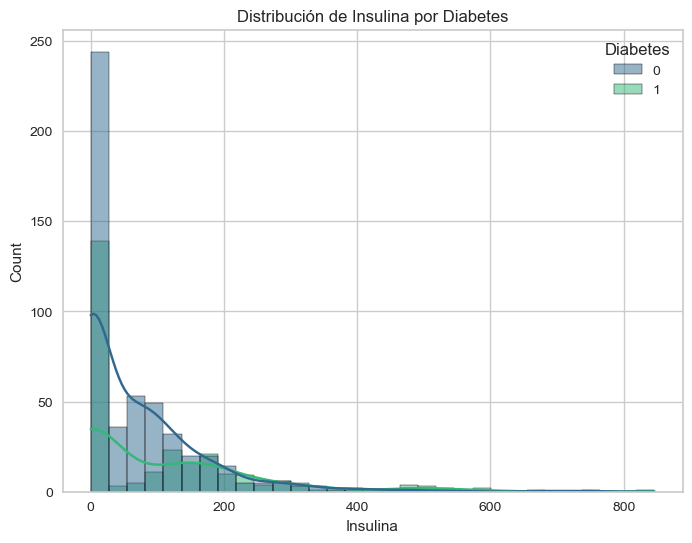

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


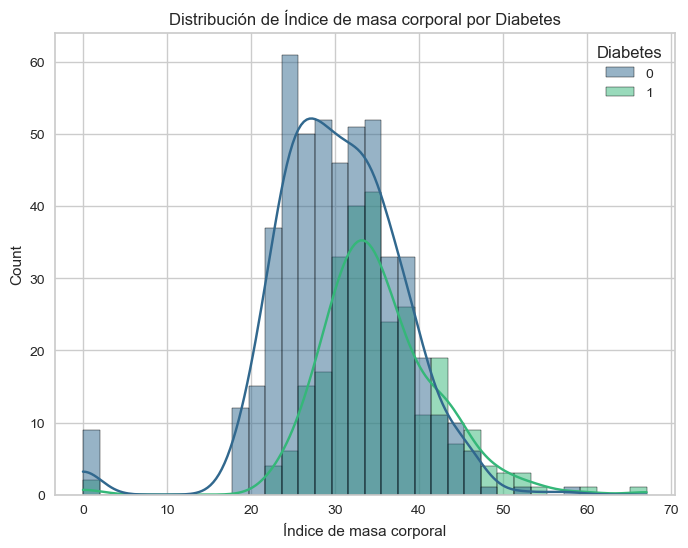

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


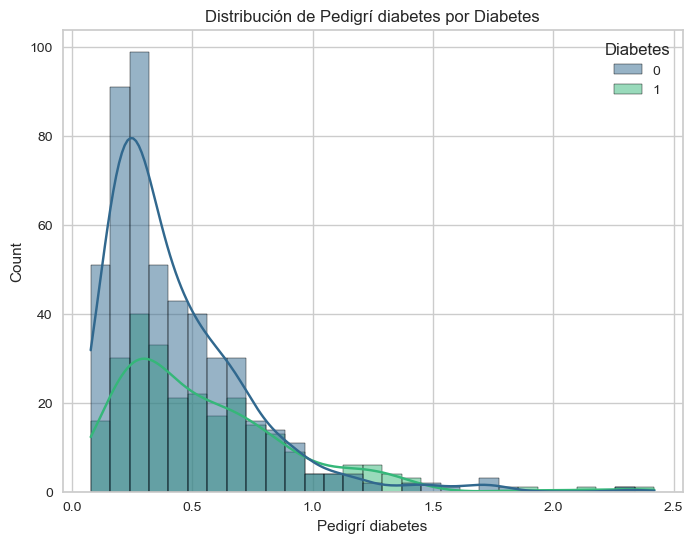

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

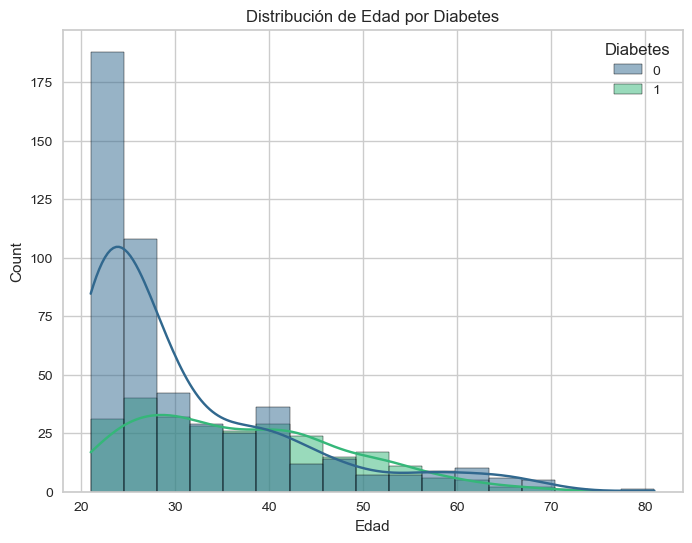

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

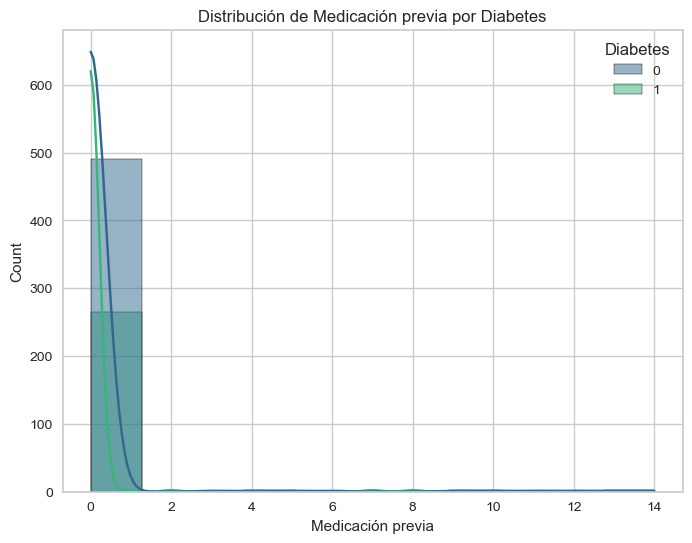

/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anaconda3/envs/nico/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/n.c.rodriguez/anacon

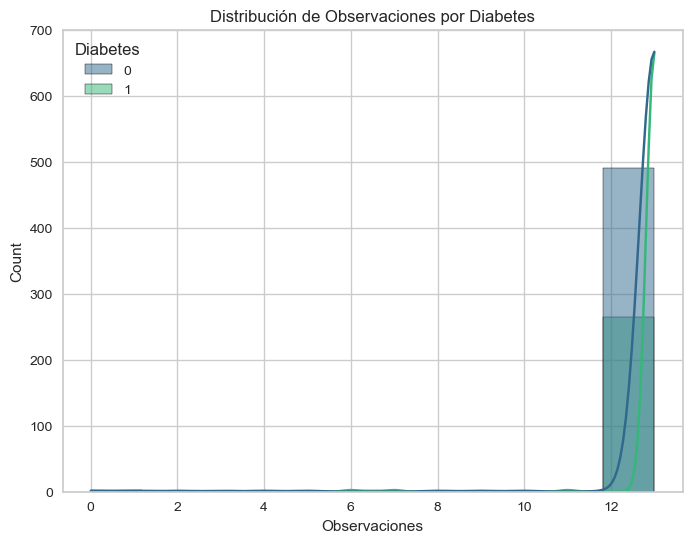

In [176]:
# Llamar a la función con el DataFrame y la variable objetivo
visualize_bivariate_numeric(df_diabetes_encoded, 'Diabetes')

Observando estas visualizaciones se saca como conclusión que todas las variables pueden servir para el modelo excepto: Medicación previa y Observaciones, así que se valorarán si eliminar viendo las correlaciones

#### Correlaciones

In [177]:
def correlaciones(df):
    # Calcular la matriz de correlación
    corr_matrix = df.corr()
    
    # Filtrar la diagonal superior
    corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return corr_upper

In [178]:
correlaciones(df_diabetes_encoded)

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones
Embarazos,NaN,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.045485,-0.013230
Glucosa,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,-0.027202,0.057339
Presión sanguínea,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.029305,-0.052718
Pliegue cutáneo,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.018485,0.059142
Insulina,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,-0.042163,0.130548,-0.049811,0.032410
Índice de masa corporal,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242,0.292695,-0.035937,0.044321
Pedigrí diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561,0.173844,0.010952,0.019771
Edad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238356,0.153620,-0.119996
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.044612,0.044618
Medicación previa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.376470


Observando el resultado de las correlaciones, las variables Medicación Previa y Observaciones se pueden eliminar del conjunto de datos. Por el momento no se eliminan, se va a esperar al Random Forest

## Modelos

Primero se va a emplear un Random Forest para ver la importancia de cada variable. En él se van a incluir todas las variables.

Después se van a emplear una Regresión Logística y un Árbol de Decisión para ver qué modelo predice mejor

In [179]:
# Se define una función para dividir un DataFrame en train , test y val
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

### Random Forest

In [182]:
# Función para aplicar un Random Forest y ver las variables más importantes
def random_forest_feature_importance(df):
    # Paso 1: Dividir los datos en conjunto de entrenamiento y prueba
    X = df.drop(columns=['Diabetes'])
    y = df['Diabetes']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Paso 2-4: Instanciar y ajustar el modelo Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Paso 5: Extraer la importancia de las características
    feature_importances = rf_model.feature_importances_

    # Paso 6: Crear un DataFrame para visualizar la importancia de las características
    importances_df = pd.DataFrame({'Características': X.columns, 'Importancia': feature_importances})
    
    # Ordenar el DataFrame por importancia de características
    importances_df = importances_df.sort_values(by='Importancia', ascending=False)

    # Paso 7: Visualizar la importancia de las características
    plt.figure(figsize=(10, 6))
    plt.barh(importances_df['Características'], importances_df['Importancia'])
    plt.xlabel('Importancia de características')
    plt.ylabel('Características')
    plt.title('Importancia de características del modelo Random Forest')
    plt.show()

    return importances_df

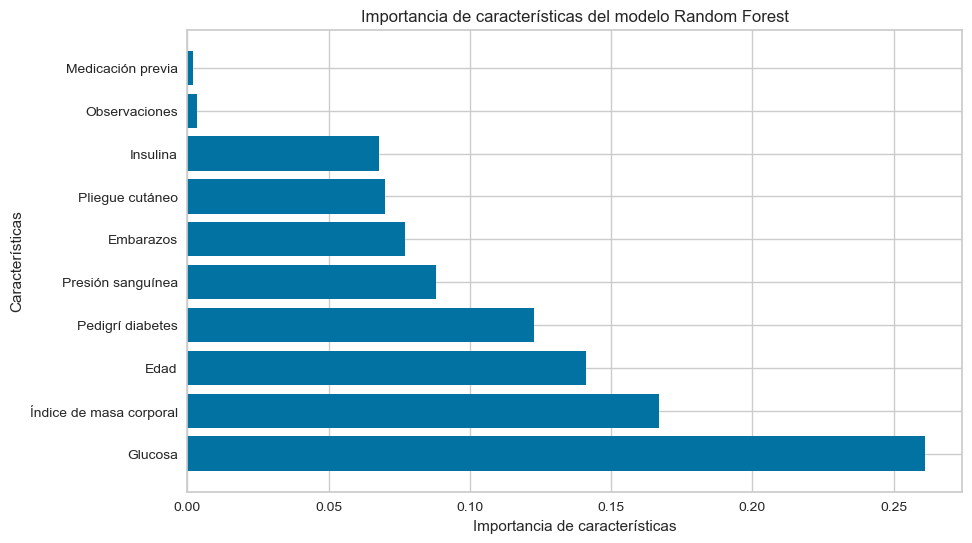

,Características,Importancia
1,Glucosa,0.261309
5,Índice de masa corporal,0.167030
7,Edad,0.141014
6,Pedigrí diabetes,0.122840
2,Presión sanguínea,0.087940
0,Embarazos,0.076934
3,Pliegue cutáneo,0.069848
4,Insulina,0.067715
9,Observaciones,0.003321
8,Medicación previa,0.002050


In [184]:
random_forest_feature_importance(df_diabetes_encoded)

Se reafirma lo observado de manera analítica y visual: las variables Observaciones y Medicación previa se eliminan del conjunto de datos para la predicción

In [151]:
df_diabetes_encoded.drop(columns=['Medicación previa', 'Observaciones'], inplace=True)

In [152]:
# Division del conjunto en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(df_diabetes_encoded)
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 460
Longitud del Validation Set: 154
Longitud del Test Set: 154


In [153]:
# Función para dividir las features de la variable target
def split_features_target(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X, y

In [154]:
# Uso de la función
X_train, y_train = split_features_target(train_set, 'Diabetes')
X_test, y_test = split_features_target(test_set, 'Diabetes')
X_val, y_val = split_features_target(val_set, 'Diabetes')

In [155]:
# Definición de función para aplicar algoritmo de Random Forest
def random_forest_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de Random Forest
    model = RandomForestClassifier(random_state=42)
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener la importancia de las características
    feature_importance = model.feature_importances_
    feature_names = X_train.columns.tolist()
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Importancia de las características:")
    for feature, importance in sorted_feature_importance:
        print(f"{feature}: {importance}")
    
    return model

Accuracy en el conjunto de test: 0.7727272727272727


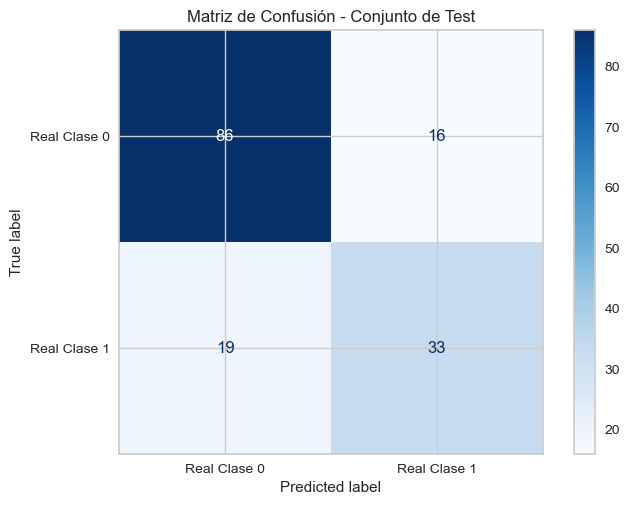

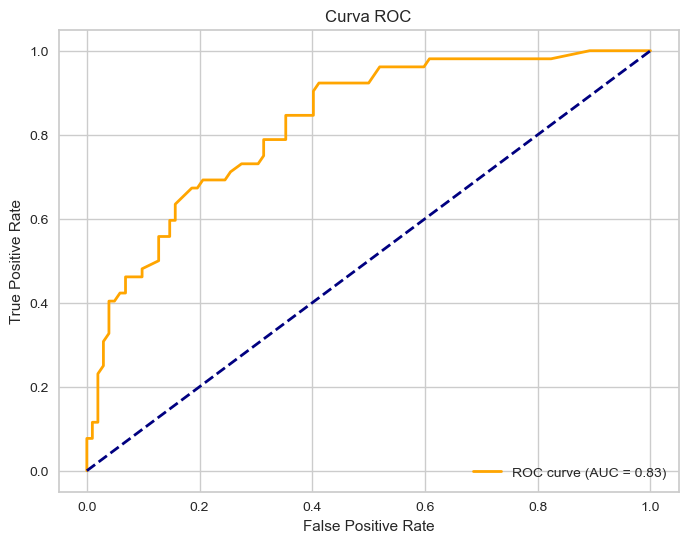

Accuracy en el conjunto de validación: 0.7792207792207793


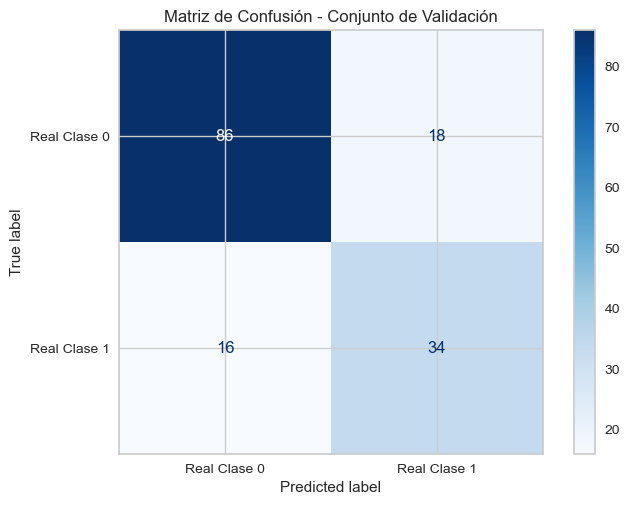

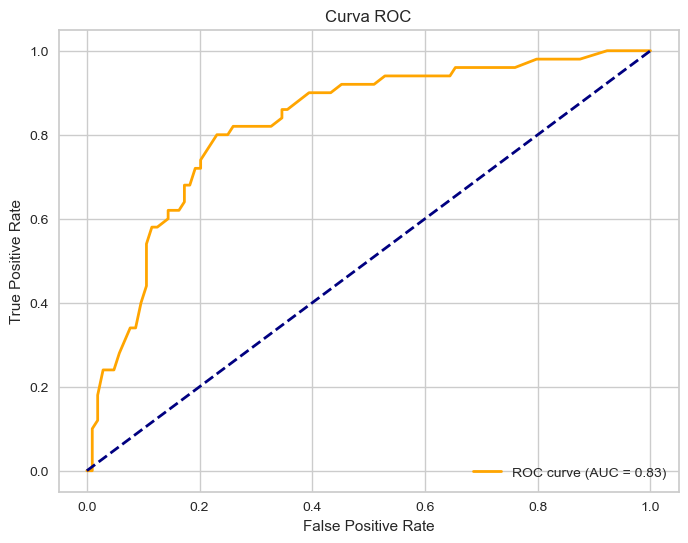

Importancia de las características:
Glucosa: 0.27161862060025943
Índice de masa corporal: 0.16505443184099566
Edad: 0.14794007256636246
Pedigrí diabetes: 0.10386811051060399
Presión sanguínea: 0.08467937835245294
Embarazos: 0.08305402381438654
Insulina: 0.07356576968576417
Pliegue cutáneo: 0.07021959262917489


RandomForestClassifier(random_state=42)

In [162]:
random_forest_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Regresión Logística

In [156]:
# Función para emplear el modelo de Regresión Logística
def logistic_regression_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de regresión logística
    model = LogisticRegression(max_iter=1000)
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener la importancia de las características
    feature_importance = model.coef_[0]
    feature_names = X_train.columns.tolist()
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Importancia de las características:")
    for feature, importance in sorted_feature_importance:
        print(f"{feature}: {importance}")
    
    return model

Accuracy en el conjunto de test: 0.7532467532467533


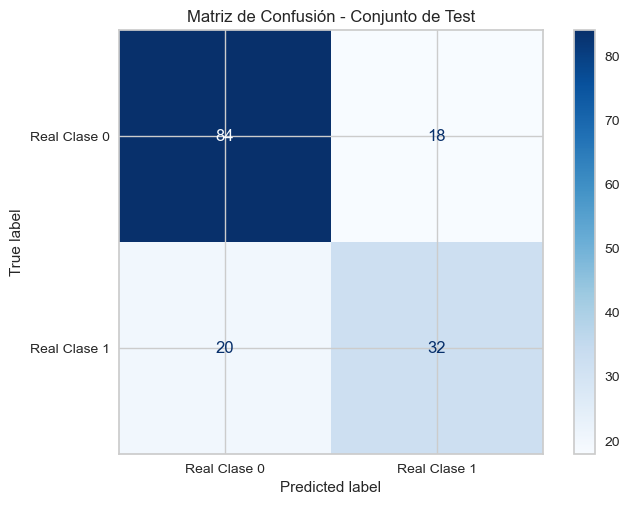

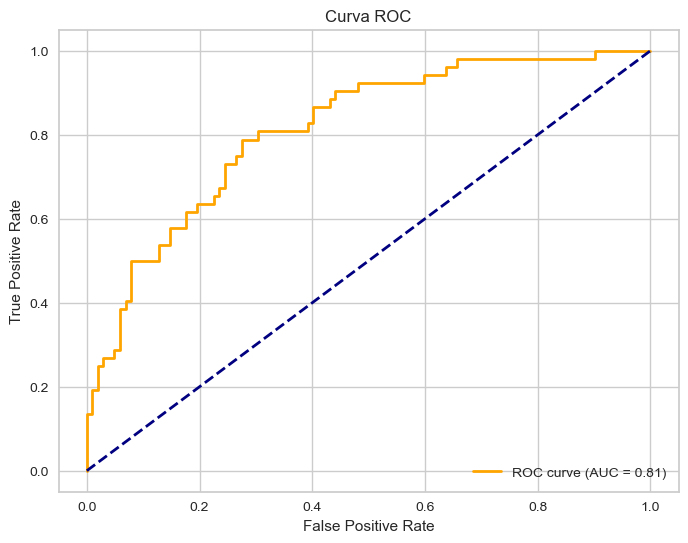

Accuracy en el conjunto de validación: 0.7662337662337663


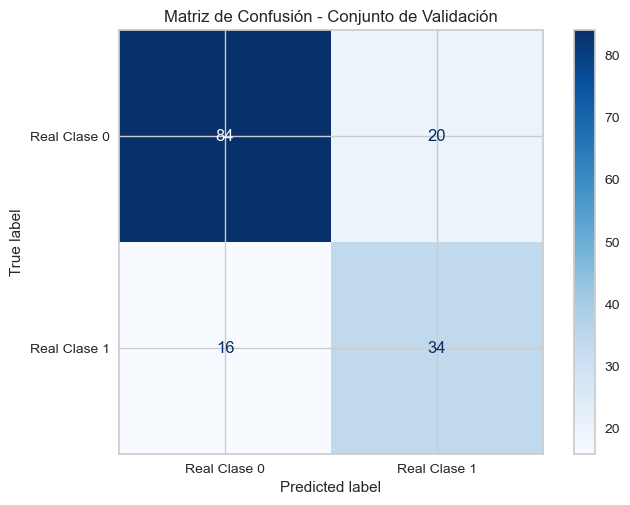

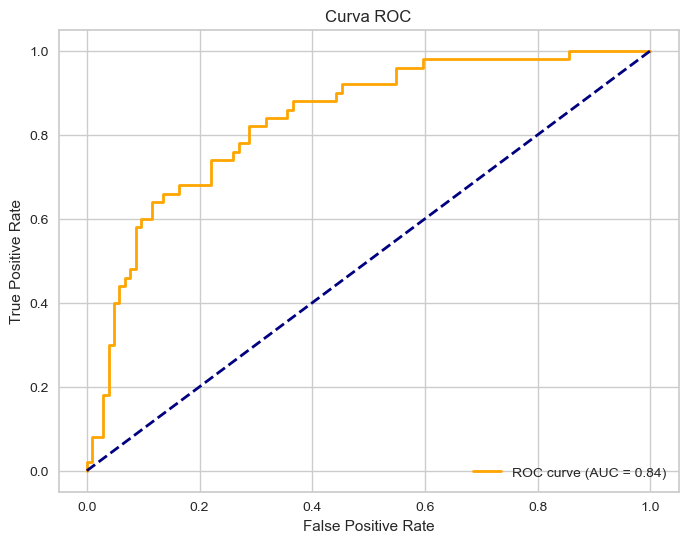

Importancia de las características:
Pedigrí diabetes: 0.3213118308460314
Índice de masa corporal: 0.11160735481692524
Embarazos: 0.06835479346123523
Edad: 0.034541720038716216
Glucosa: 0.0319327906833325
Presión sanguínea: -0.010981978427303007
Pliegue cutáneo: -0.004504793624470955
Insulina: -0.0004443429414795281


LogisticRegression(max_iter=1000)

In [157]:
logistic_regression_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Árbol de Decisión

In [158]:
def decision_tree_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de árbol de decisión
    model = DecisionTreeClassifier()
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Obtener la importancia de las características
    feature_importance = model.feature_importances_
    feature_names = X_train.columns.tolist()
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Importancia de las características:")
    for feature, importance in sorted_feature_importance:
        print(f"{feature}: {importance}")
    
    return model


Accuracy en el conjunto de test: 0.7272727272727273


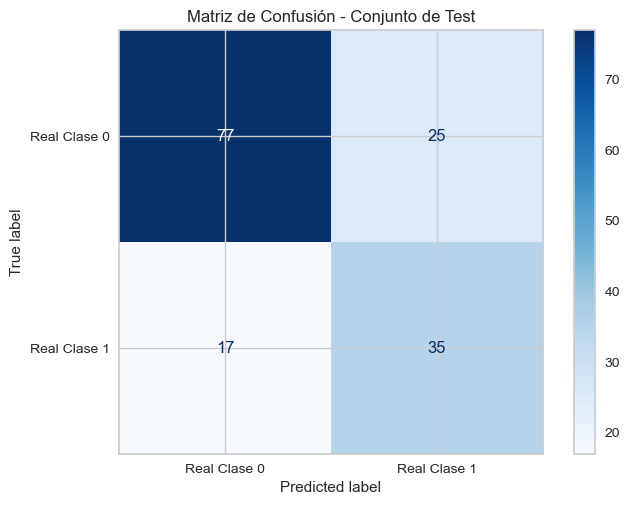

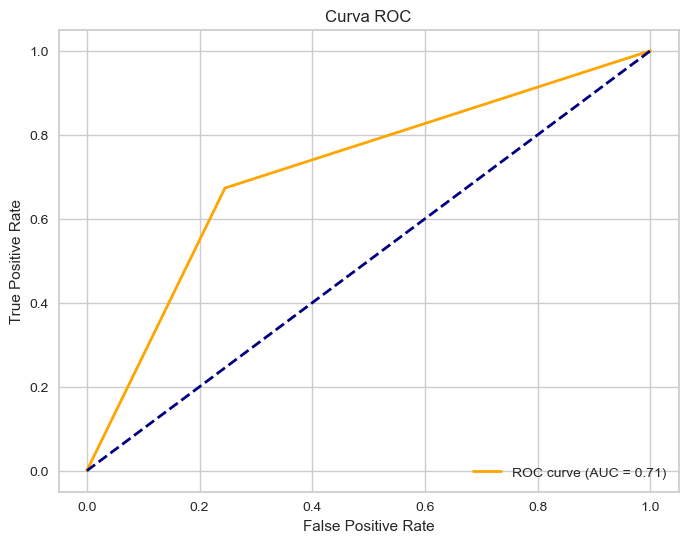

Accuracy en el conjunto de validación: 0.7207792207792207


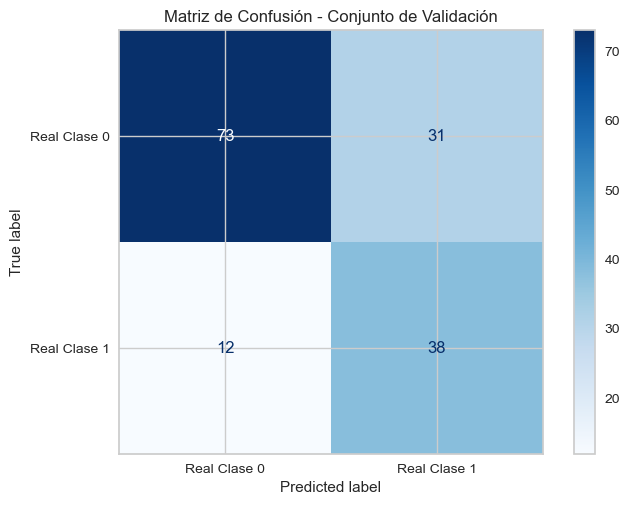

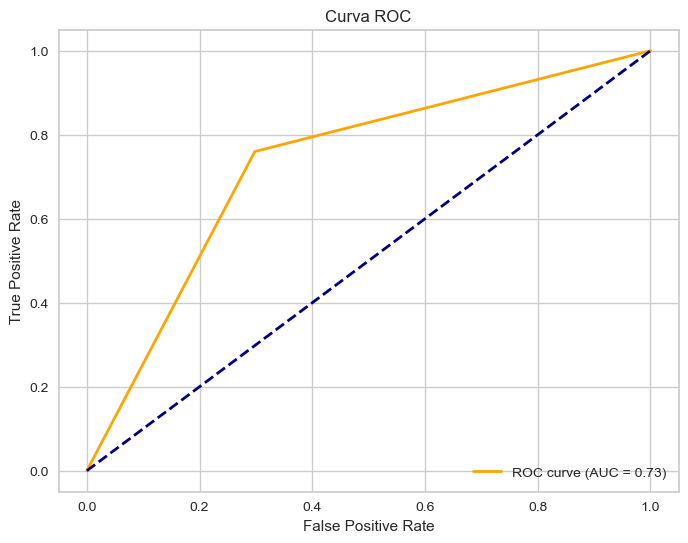

Importancia de las características:
Glucosa: 0.34379395461293644
Edad: 0.13745906682120418
Índice de masa corporal: 0.13495691110811237
Pedigrí diabetes: 0.11756321721984302
Presión sanguínea: 0.10232161676115145
Pliegue cutáneo: 0.06574687777048238
Embarazos: 0.05031691391416006
Insulina: 0.0478414417921102


DecisionTreeClassifier()

In [159]:
decision_tree_model(X_train, y_train, X_test, y_test, X_val, y_val)


### Gaussian Naive Bayes

In [160]:
def gaussian_naive_bayes_model(X_train, y_train, X_test, y_test, X_val, y_val):
    # Inicializar el modelo de Naive Bayes Gaussiano
    model = GaussianNB()
    
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validar el modelo con el conjunto de test
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Accuracy en el conjunto de test:", test_accuracy)

    #MÉTRICAS CONJUNTO DE TEST
    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Graficar la matriz de confusión
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Test')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    auc = roc_auc_score(y_test, y_test_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    #MÉTRICAS CONJUNTO DE VALIDACIÓN
    # Evaluar el modelo con el conjunto de validación
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Accuracy en el conjunto de validación:", val_accuracy)

    # Calcular la matriz de confusión con el conjunto de test
    cm = confusion_matrix(y_val, y_val_pred)
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - Conjunto de Validación')
    plt.show()
    
    # Calcular la probabilidad de predicción para la clase positiva
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
    auc = roc_auc_score(y_val, y_val_prob)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    return model

Accuracy en el conjunto de test: 0.7532467532467533


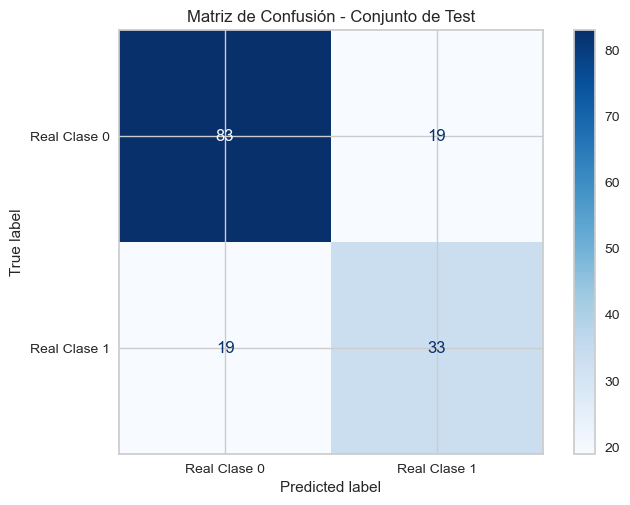

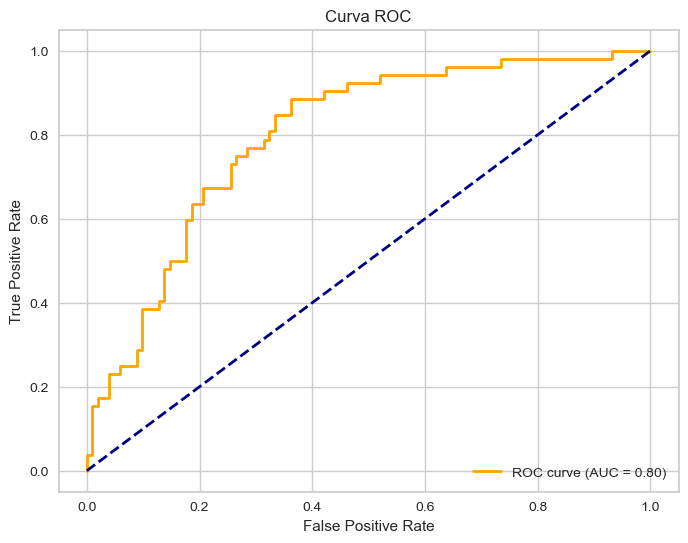

Accuracy en el conjunto de validación: 0.7662337662337663


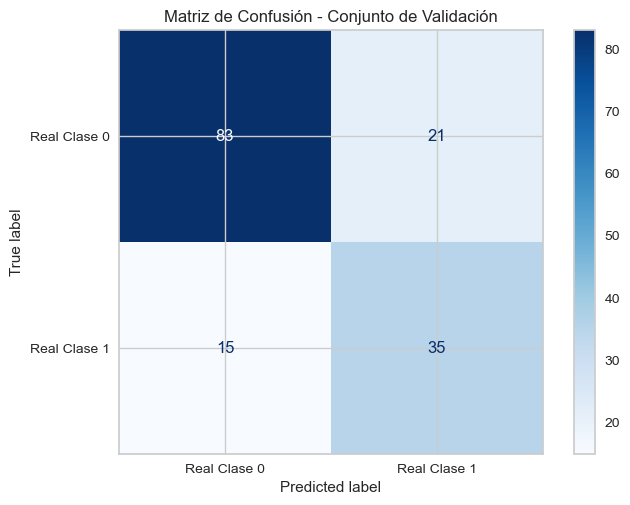

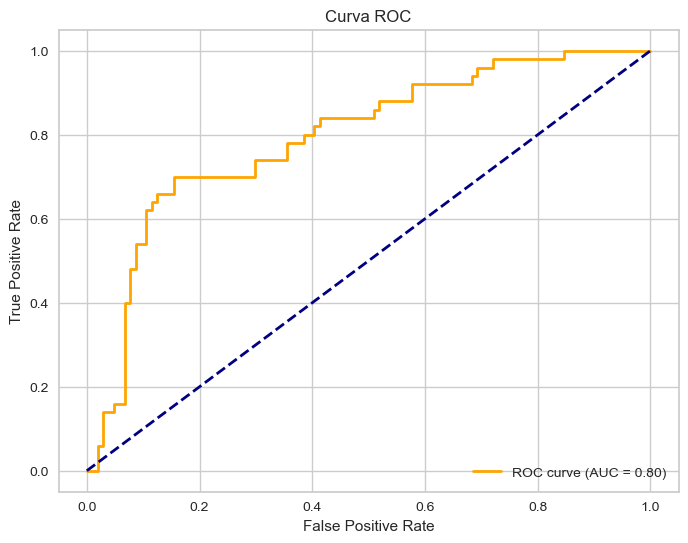

GaussianNB()

In [161]:
gaussian_naive_bayes_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Conclusión

1. Random Forest:
- Presenta una precisión (accuracy) del 77.27% en el conjunto de prueba y del 77.92% en el conjunto de validación.
- AUC de 0.83 en ambos conjuntos, indicando una buena capacidad del modelo para distinguir entre clases.
- La importancia de las características muestra una distribución equilibrada, con la glucosa, el índice de masa corporal y la edad como las características más relevantes.
  
2. Regresión Logística:
- Una precisión del 75.32% en el conjunto de prueba y del 76.62% en el conjunto de validación.
- AUC de 0.81 en el conjunto de prueba y 0.84 en el conjunto de validación.
- La importancia de las características destaca el pedigrí diabetes como la característica más influyente, seguida del índice de masa corporal y los embarazos.
  
3. Árbol de Decisión:
- Presenta una precisión del 72.73% en el conjunto de prueba y del 72.08% en el conjunto de validación.
- AUC de 0.71 en el conjunto de prueba y 0.73 en el conjunto de validación.
- La importancia de las características indica que la glucosa es la característica más relevante, seguida de la edad y el índice de masa corporal.
  
4. Gaussian Naive Bayes:
- Tiene una precisión del 75.32% en el conjunto de prueba y del 76.62% en el conjunto de validación.
- AUC de 0.80 tanto en el conjunto de prueba como en el de validación.

  
Dada la naturaleza del negocio y considerando tanto la precisión como la capacidad de generalización, parece que el modelo de Regresión Logística podría ser la mejor opción. Aunque Random Forest también ofrece buenos resultados, la simplicidad y la interpretabilidad de la regresión logística podrían ser ventajas importantes, especialmente si el modelo necesita ser explicado o comprendido por usuarios no técnicos. Sin embargo, dado que la precisión y las métricas de rendimiento son comparables entre ambos modelos, se podría considerar probar ambos en un entorno de producción y evaluar su rendimiento en situaciones reales antes de tomar una decisión final.

## Modelos con 4 variables (Pedigrí diabetes, Edad, Índice de masa corporal, Glucosa)

Se van a probar los dos mejores modelos anteriores, Random Forest y Regresióbn Logística, pero ahora tan sólo con las 4 varibales más importantes definidas por el Random Forest

In [189]:
# Se filtra el DataFrame por esas variables
df_diabetes_encoded_filter = df_diabetes_encoded[['Pedigrí diabetes', 'Edad', 'Índice de masa corporal', 'Glucosa', 'Diabetes']]
df_diabetes_encoded_filter

,Pedigrí diabetes,Edad,Índice de masa corporal,Glucosa,Diabetes
0,0.627,50,33.6,148,1
1,0.351,31,26.6,85,0
2,0.672,32,23.3,183,1
3,0.167,21,28.1,89,0
4,2.288,33,43.1,137,1
...,...,...,...,...,...
763,0.171,63,32.9,101,0
764,0.340,27,36.8,122,0
765,0.245,30,26.2,121,0
766,0.349,47,30.1,126,1


In [190]:
# Division del conjunto en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(df_diabetes_encoded_filter)
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 460
Longitud del Validation Set: 154
Longitud del Test Set: 154


In [191]:
# Uso de la función
X_train, y_train = split_features_target(train_set, 'Diabetes')
X_test, y_test = split_features_target(test_set, 'Diabetes')
X_val, y_val = split_features_target(val_set, 'Diabetes')

### Random Forest

Accuracy en el conjunto de test: 0.7662337662337663


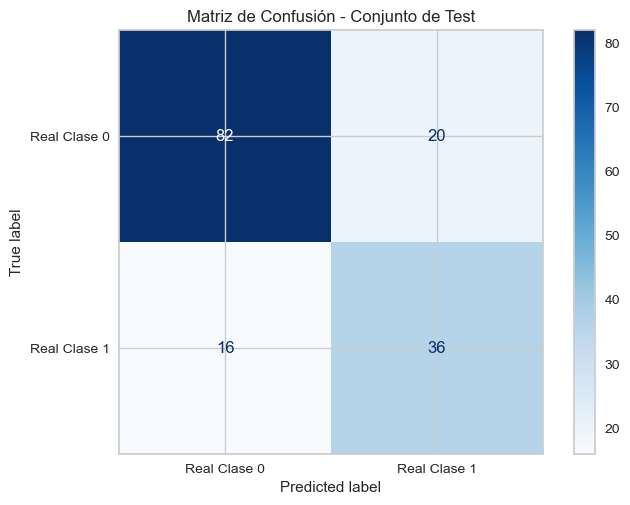

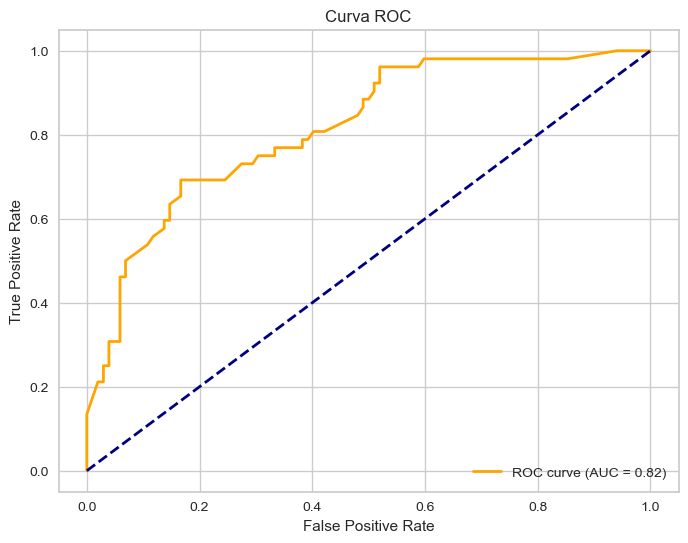

Accuracy en el conjunto de validación: 0.7857142857142857


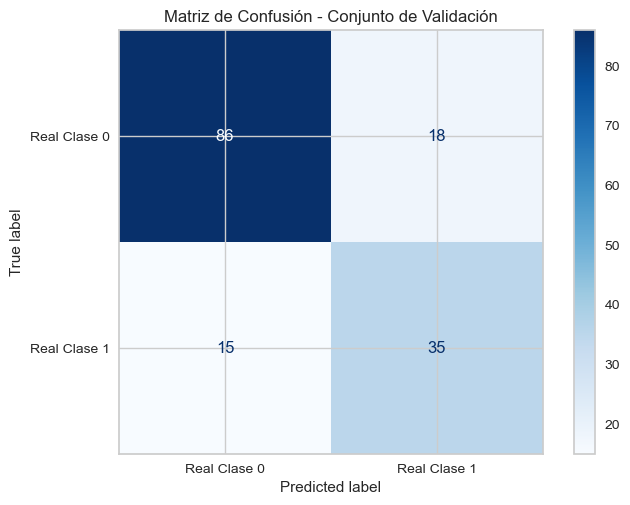

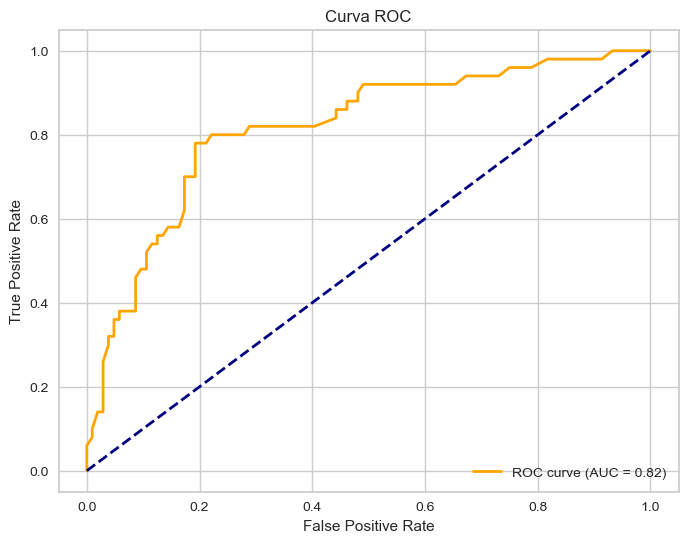

Importancia de las características:
Glucosa: 0.3526306234182251
Índice de masa corporal: 0.24155751881389442
Edad: 0.2187767959344914
Pedigrí diabetes: 0.18703506183338903


RandomForestClassifier(random_state=42)

In [192]:
random_forest_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Regresión Logística

Accuracy en el conjunto de test: 0.7532467532467533


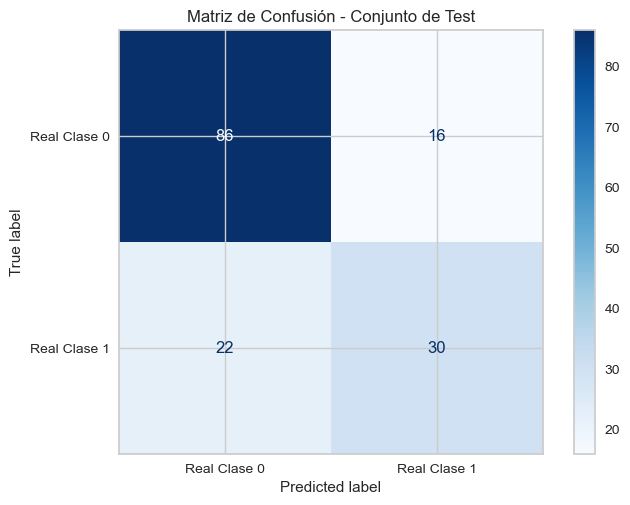

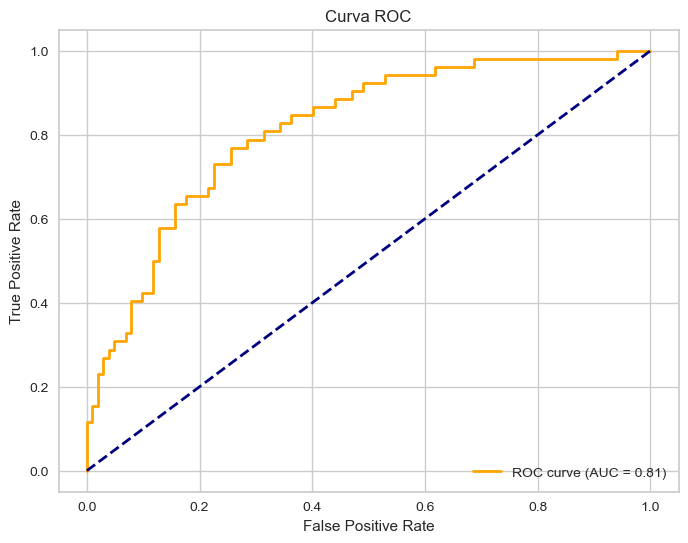

Accuracy en el conjunto de validación: 0.7662337662337663


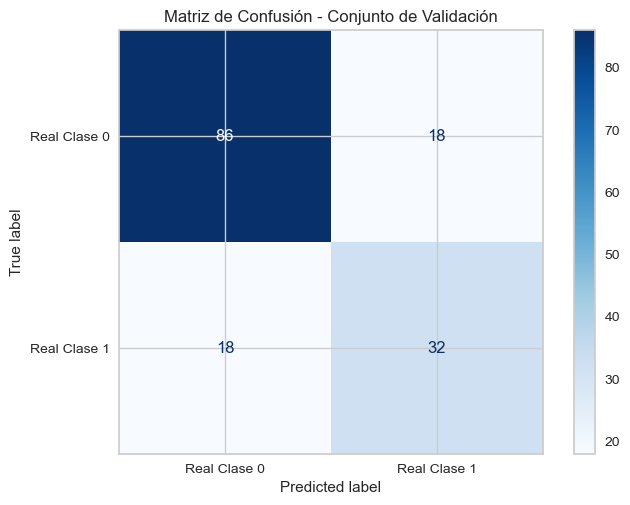

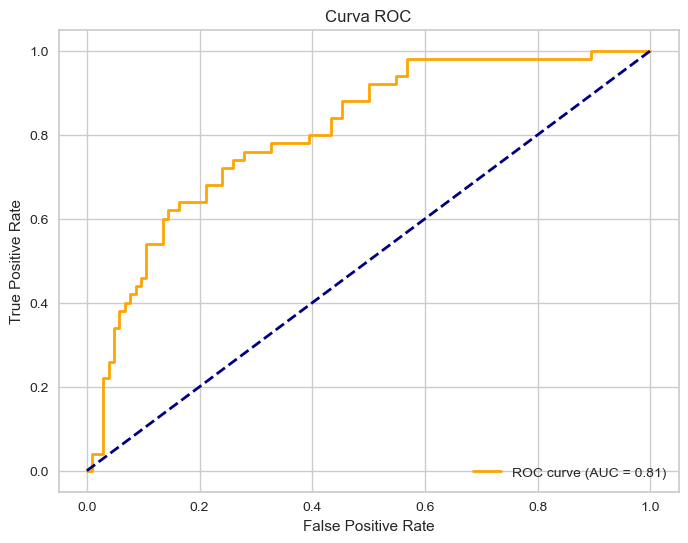

Importancia de las características:
Pedigrí diabetes: 0.275815941276295
Índice de masa corporal: 0.10182406640744275
Edad: 0.04194433028464439
Glucosa: 0.030823087189004103


LogisticRegression(max_iter=1000)

In [193]:
logistic_regression_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Árbol de decisión

Accuracy en el conjunto de test: 0.7077922077922078


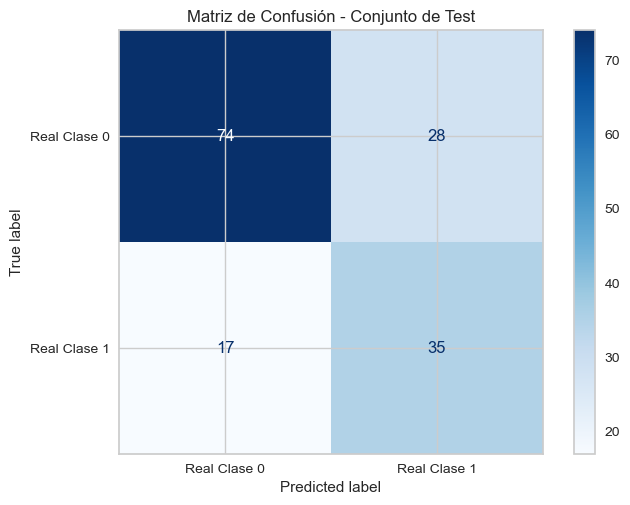

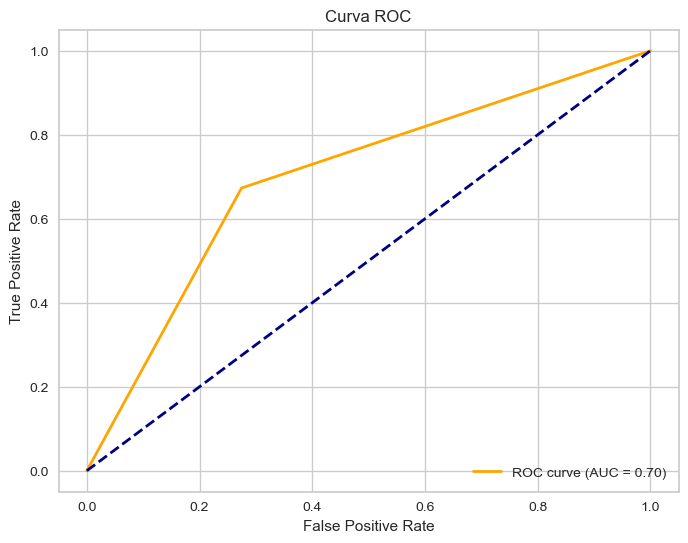

Accuracy en el conjunto de validación: 0.7142857142857143


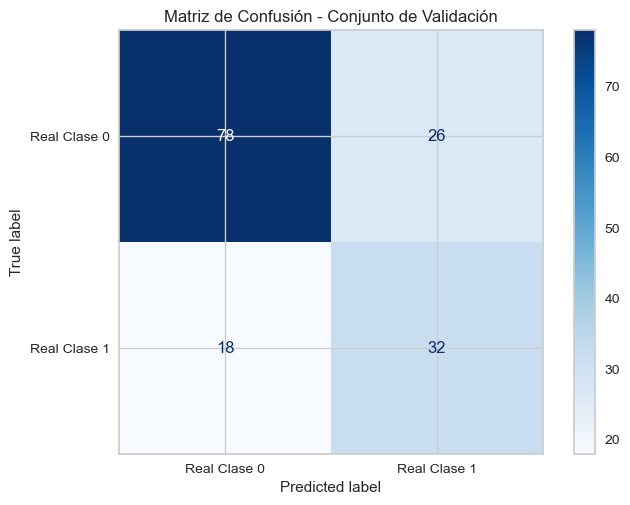

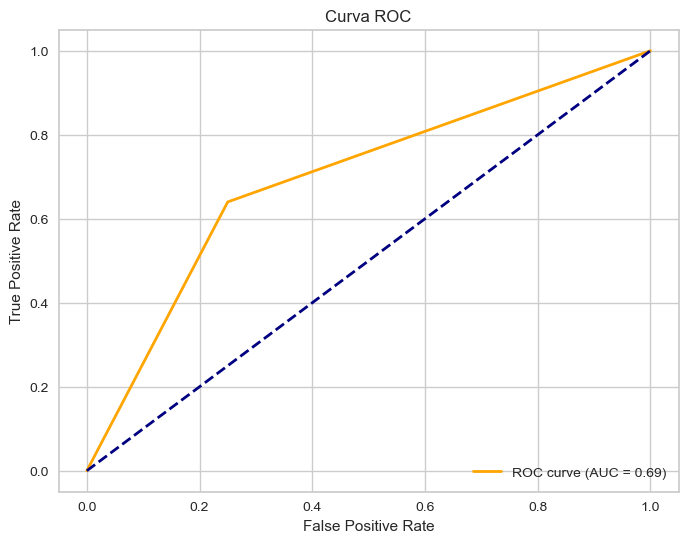

Importancia de las características:
Glucosa: 0.4177403360023252
Edad: 0.2207266369715902
Índice de masa corporal: 0.21447181168721066
Pedigrí diabetes: 0.14706121533887404


DecisionTreeClassifier()

In [194]:
decision_tree_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Gaussian Naive Bayes

Accuracy en el conjunto de test: 0.7727272727272727


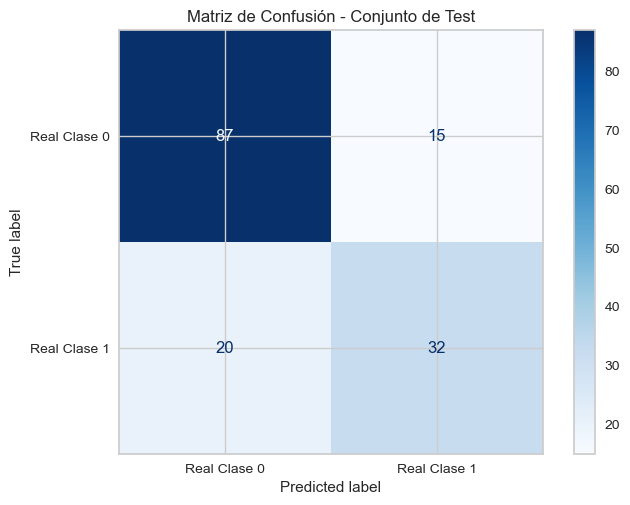

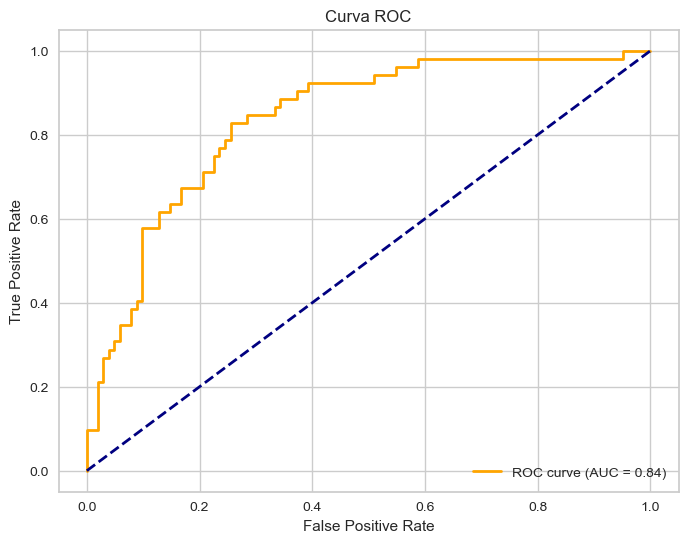

Accuracy en el conjunto de validación: 0.7727272727272727


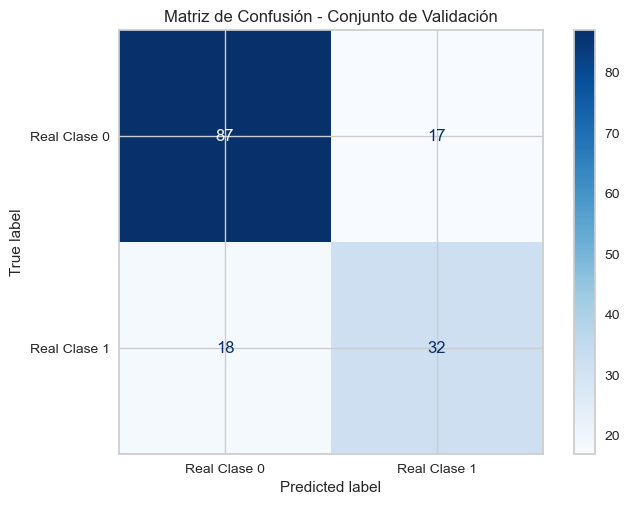

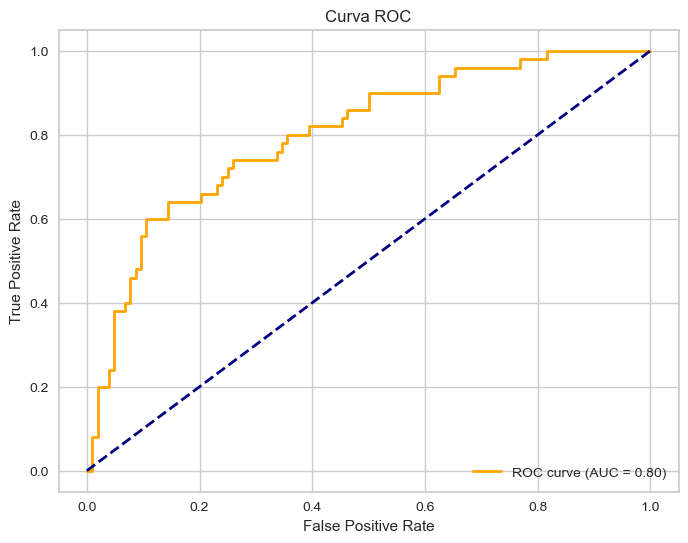

GaussianNB()

In [195]:
gaussian_naive_bayes_model(X_train, y_train, X_test, y_test, X_val, y_val)

### Conclusión

La reducción a 4 variables no ha mejorado los modelos de manera general, tan sólo el de Gausiiam Naive Bayes de manera notable, aún así siguen sinedo mejores el Random Forest y la Regresión Logística de la primera prueba con todas las features.